# Annual Rainfall Prediction Using Multilinear Regression
#The data refers to details on climatological normals of district wise rainfall (in mm) 
#calculated with the data for the period 1951-2000.

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
import seaborn as sb
from sklearn import preprocessing
%matplotlib inline 
print("done")
path = "/Users/varun/Desktop/git/rainfall.csv"
data = pd.read_csv(path)
print("file imported")

done
file imported


In [9]:
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:") 
print(data.isnull().sum())
print("Filling null values with mean of that particular column") 
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:") 
print(data.isnull().sum())
print("\n\nShape: ",data.shape)

Data heads:
                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  


In [10]:
print("Info:") 
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.2+ KB
None


In [12]:
# Grouping By the name of States
print("Group by:") 
data.groupby('STATE_UT_NAME').size()

Group by:


STATE_UT_NAME
ANDAMAN And NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHATISGARH                     18
DADAR NAGAR HAVELI              1
DAMAN AND DUI                   2
DELHI                           9
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL                       12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         9
NAGALAND                       11
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33


In [13]:
# Checking the correlation and covariance between the columns
print("Co-Variance =",data.cov())
print("Co-Relation =",data.corr())

Co-Variance =                  JAN          FEB           MAR           APR           MAY  \
JAN       444.484728   507.815360    660.010691    517.835460    363.921751   
FEB       507.815360   768.930475   1133.848044   1256.484628   1224.154220   
MAR       660.010691  1133.848044   2065.800897   2725.718979   3099.931136   
APR       517.835460  1256.484628   2725.718979   5120.301052   7093.308059   
MAY       363.921751  1224.154220   3099.931136   7093.308059  12535.128875   
JUN      -128.154123  1059.150365   3236.366635   8874.651683  17293.007258   
JUL       -35.546780   867.121761   2059.473685   6159.985479  12899.867909   
AUG        87.543039   649.127817   1189.317757   3276.102957   7311.729522   
SEP        30.255282   586.806438   1529.316122   3936.005296   7721.863557   
OCT         4.079491   383.732130   1146.534354   3145.154854   5918.914590   
NOV       143.556849   164.334367    294.313626    869.776978   1685.667479   
DEC       288.217757   269.679654    3

In [17]:
corr_cols = data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns:",corr_cols.index)

Index of correlation columns: Index(['ANNUAL', 'JUN', 'Jun-Sep', 'JUL', 'SEP', 'MAY', 'AUG', 'Mar-May',
       'APR', 'OCT', 'MAR', 'Oct-Dec', 'FEB', 'Jan-Feb', 'NOV', 'JAN', 'DEC'],
      dtype='object')


Scatter plot of annual and january attributes


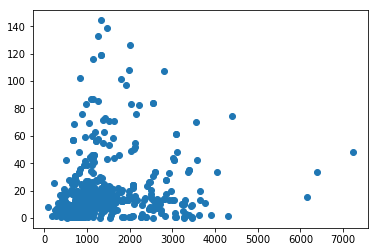

In [16]:
#Data Visualization of the Annual Rainfall 
print("Scatter plot of annual and january attributes") 
plt.scatter(data.ANNUAL,data.JAN)

Box Plot of annual rainfall data in years 1901-2015


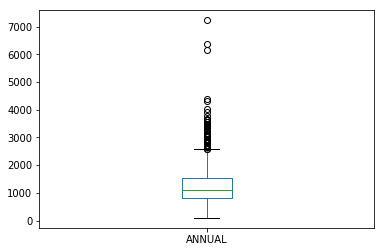

In [18]:
print("Box Plot of annual rainfall data in years 1901-2015") 
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:


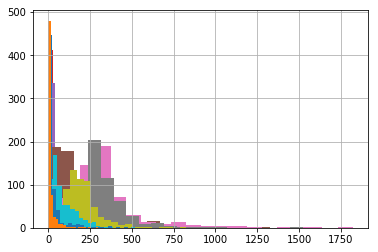

In [20]:
print("Histograms showing the data from attributes (JANUARY to DECEMBER) of the years 1901-2015:") 
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20) 
data['MAY'].hist(bins=20) 
data['JUN'].hist(bins=20) 
data['JUL'].hist(bins=20) 
data['AUG'].hist(bins=20) 
data['SEP'].hist(bins=20) 
data['OCT'].hist(bins=20) 
data['NOV'].hist(bins=20) 
data['DEC'].hist(bins=20)

Histogram showing the annual rainfall of the all states:


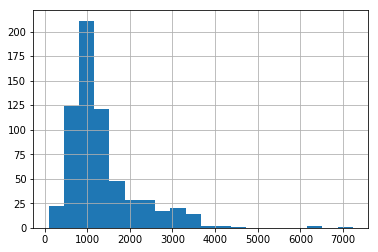

In [21]:
print("Histogram showing the annual rainfall of the all states:")
data['ANNUAL'].hist(bins=20)

In [ ]:
print("Violin plot of the ANNUAL attribute :-")
sb.violinplot(data=data['ANNUAL'])

___Multiple Linear regression model between annual rainfall and the periodic rainfall___
Train x shape (448, 4) ; Test_x (193, 4)
Train y shape (448,) ; Test_y (193,)
Mean Squared Error = 1.0408399182808801e-25
Root Mean Squared Error = 3.2262050745122824e-13
Mean Absolute Error = 2.4298352621847986e-13
r2_score = 1.0


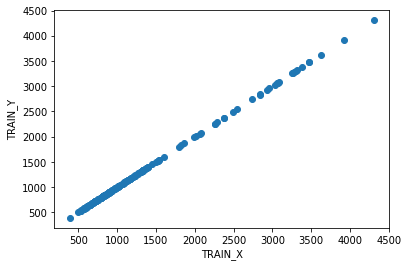

In [37]:
#Model Evaluation and Testing
from sklearn import linear_model
print("___Multiple Linear regression model between annual rainfall and the periodic rainfall___") 
y=data['ANNUAL']
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']] 
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.3,shuffle=False) 
'''train_x=train_x[:,np.newaxis]
test_x=test_x[:,np.newaxis]'''
print("Train x shape",train_x.shape,"; Test_x",test_x.shape)
print("Train y shape",train_y.shape,"; Test_y",test_y.shape)
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(test_x)
#print(test_y)
#print(pred)
print("Mean Squared Error =",mse(test_y,pred))
print("Root Mean Squared Error =",np.sqrt(mse(test_y,pred)))
print("Mean Absolute Error =",mae(test_y,pred))
print("r2_score =",r2(test_y,pred))
plt.scatter(pred,test_y)
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()

In [39]:
expected=[]
for i in test_y:
    if i>2000:
        expected.append("high")
    else:
        expected.append("low")
predicted=[]
for i in pred: 
    if i>2000:
        predicted.append("high") 
    else:
        predicted.append("low")
        
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
acc=accuracy_score(predicted,expected) 
matrix=confusion_matrix(predicted,expected) 
clas=classification_report(predicted,expected)
print("accuracy")
print(acc)
print("\n")
print("classification")
print(clas)        

accuracy
1.0


classification
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        30
         low       1.00      1.00      1.00       163

   micro avg       1.00      1.00      1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



In [40]:
 exp=[]
pre=[]
for i in expected:
    if i=='high': 
        exp.append(1)
    else: 
        exp.append(0)
for i in predicted: 
    if i=='high':
        pre.append(1) 
    else:
        pre.append(0)

Text(0.5, 0, 'False Positive Rate')

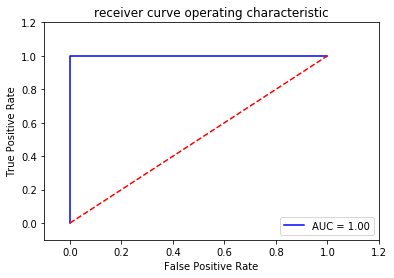

In [41]:
from sklearn.metrics import roc_curve,auc
import random
fpr,tpr,threshold=roc_curve(exp,pre)
roc_auc=auc(fpr,tpr)
plt.title("receiver curve operating characteristic")
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.xlabel("False Positive Rate")